<a href="https://colab.research.google.com/github/bogus1aw/218485.BoguslawMatysik.iosLab1/blob/master/M_TD_IDF_wiki_34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF benchmark for wiki dataset https://clarin-pl.eu/dspace/handle/11321/738

gdrive mounted manually form GUI

In [30]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import matplotlib.pyplot as plt

# 1. Function definitions

In [17]:
def load_corpora_to_dataframe(corpora):
  data = open(corpora).read()
  labels, texts = [], []
  for i, line in enumerate(data.split("\n")):
      content = line.split()
      labels.append(content[0])
      texts.append(" ".join(content[1:]))

  # create a dataframe using texts and lables
  trainDF = pandas.DataFrame()
  trainDF['text'] = texts
  trainDF['label'] = labels
  return trainDF

In [18]:
def calculate_feature_vectors_tfifd(max_features):
  # word level tf-idf
  tfidf_vect = TfidfVectorizer(analyzer='word', max_features=max_features)
  tfidf_vect.fit(trainDF['text']) 
  xtrain_tfidf =  tfidf_vect.transform(train_x)
  xvalid_tfidf =  tfidf_vect.transform(valid_x)
  # ngram level tf-idf 
  tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(1,2 ), max_features=max_features)
  tfidf_vect_ngram.fit(trainDF['text'])
  xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
  xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
  return xtrain_tfidf, xvalid_tfidf, xtrain_tfidf_ngram, xvalid_tfidf_ngram

In [19]:
def clasification_benchmark(txt_description, classifier, feature_vector_train, feature_vector_valid):
  classifier.fit(feature_vector_train, train_y)
  predictions = classifier.predict(feature_vector_valid)
  accuracy = metrics.accuracy_score(valid_y, predictions)
  print(txt_description, ' ', accuracy)
  return accuracy

In [20]:
def calculate_classifiers_accuracy(feature_no_list):
  accuracy_matrix = []

  for max_feature in feature_no_list:
    print(max_feature)
    xtrain_tfidf, xvalid_tfidf, xtrain_tfidf_ngram, xvalid_tfidf_ngram = calculate_feature_vectors_tfifd(max_feature)
    acc_list = []
    acc_list.append(clasification_benchmark('NB,  word,      ', naive_bayes.MultinomialNB(), xtrain_tfidf, xvalid_tfidf)) 
    acc_list.append(clasification_benchmark('NB,  (1-2)grams ', naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, xvalid_tfidf_ngram)) 
    acc_list.append(clasification_benchmark('SVM, word,      ', svm.SVC(), xtrain_tfidf, xvalid_tfidf)) 
    acc_list.append(clasification_benchmark('SVM, (1-2)grams ', svm.SVC(), xtrain_tfidf_ngram, xvalid_tfidf_ngram)) 
    acc_list.append(clasification_benchmark('LR, word,       ', linear_model.LogisticRegression(), xtrain_tfidf, xvalid_tfidf)) 
    acc_list.append(clasification_benchmark('LR, (1-2)gram   ', linear_model.LogisticRegression(), xtrain_tfidf_ngram, xvalid_tfidf_ngram))
    accuracy_matrix.append(acc_list)
  return accuracy_matrix

# 2. Constants and paths defintion

In [49]:
fig_path = '/content/drive/MyDrive/figures/'
feature_no_list = [1000, 5000, 10000, 15000, 20000, 40000]
 

# raw corpora
raw_corpora = '/content/drive/MyDrive/master_datasets/wiki_preprocessed/wikiInOneFileDataset.txt'
save_heat_map_path = fig_path + 'wiki_tfidf_classfiers_features_number_heatmap.svg'
# lemmatized corpora
lemmatized_corpora = '/content/drive/MyDrive/master_datasets/wiki_preprocessed/wikiInOneFileDataset_lemmas.txt'
save_heat_map_path = fig_path + 'wiki_tfidf_classfiers_features_number_heatmap_lemmas.svg'

# 3. Benchmarks
## 3.1 Raw corpora benchmark

In [26]:
trainDF = load_corpora_to_dataframe(raw_corpora)

# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
df = pandas.DataFrame(calculate_classifiers_accuracy(feature_no_list), 
                      columns=('NB,  word,      ', 'NB,  (1-2)grams ', 'SVM, word,      ', 'SVM, (1-2)grams ', 'LR, word,       ', 'LR, (1-2)gram   '),
                      index=feature_no_list)
df

1000
NB,  word,         0.7276422764227642
NB,  (1-2)grams    0.7183507549361208
SVM, word,         0.7555168408826946
SVM, (1-2)grams    0.7520325203252033
LR, word,          0.7555168408826946
LR, (1-2)gram      0.7537746806039489
5000
NB,  word,         0.835075493612079
NB,  (1-2)grams    0.8257839721254355
SVM, word,         0.8565621370499419
SVM, (1-2)grams    0.8461091753774681
LR, word,          0.8687572590011614
LR, (1-2)gram      0.8635307781649245
10000
NB,  word,         0.8507549361207898
NB,  (1-2)grams    0.8455284552845529
SVM, word,         0.859465737514518
SVM, (1-2)grams    0.8565621370499419
LR, word,          0.8855981416957027
LR, (1-2)gram      0.8815331010452961
15000
NB,  word,         0.8519163763066202
NB,  (1-2)grams    0.8536585365853658
SVM, word,         0.8658536585365854
SVM, (1-2)grams    0.859465737514518
LR, word,          0.8902439024390244
LR, (1-2)gram      0.8867595818815331
20000
NB,  word,         0.8554006968641115
NB,  (1-2)grams    0.8536

,"NB, word,","NB, (1-2)grams","SVM, word,","SVM, (1-2)grams","LR, word,","LR, (1-2)gram"
1000,0.727642,0.718351,0.755517,0.752033,0.755517,0.753775
5000,0.835075,0.825784,0.856562,0.846109,0.868757,0.863531
10000,0.850755,0.845528,0.859466,0.856562,0.885598,0.881533
15000,0.851916,0.853659,0.865854,0.859466,0.890244,0.886760
20000,0.855401,0.853659,0.867596,0.860627,0.893728,0.887921
40000,0.858304,0.855401,0.862369,0.863531,0.892567,0.892567


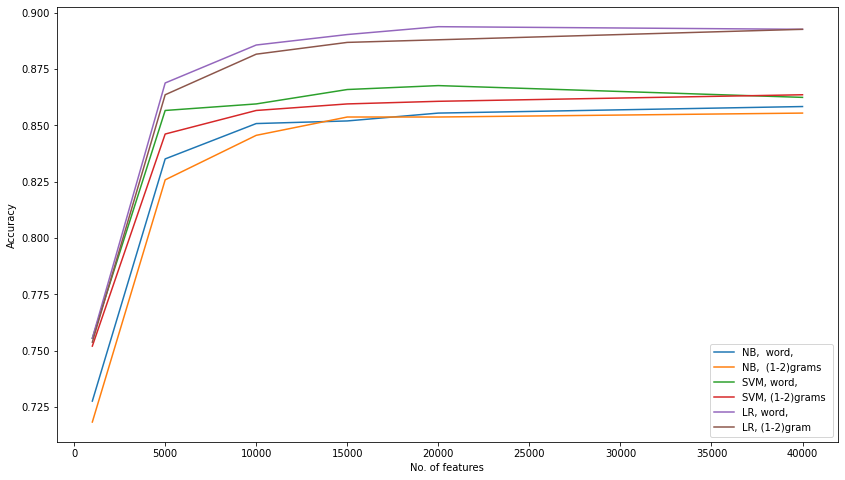

In [38]:
fig = df.plot.line(figsize=(14,8), xlabel='No. of features', ylabel='Accuracy').get_figure()

In [50]:
fig.savefig(fig_path + 'wiki_tfidf_classfiers_features_number_accuracy_chart.svg')

## 3.2 Lemmatized corpora benchamrk

In [51]:
trainDF = load_corpora_to_dataframe(lemmatized_corpora)

# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
df = pandas.DataFrame(calculate_classifiers_accuracy(feature_no_list), 
                      columns=('NB,  word,      ', 'NB,  (1-2)grams ', 'SVM, word,      ', 'SVM, (1-2)grams ', 'LR, word,       ', 'LR, (1-2)gram   '),
                      index=feature_no_list)
df

1000
NB,  word,         0.8025551684088269
NB,  (1-2)grams    0.7967479674796748
SVM, word,         0.8554006968641115
SVM, (1-2)grams    0.8455284552845529
LR, word,          0.8548199767711963
LR, (1-2)gram      0.8484320557491289
5000
NB,  word,         0.8478513356562137
NB,  (1-2)grams    0.8472706155632985
SVM, word,         0.8914053426248548
SVM, (1-2)grams    0.8879210220673636
LR, word,          0.8948896631823461
LR, (1-2)gram      0.89198606271777
10000
NB,  word,         0.8472706155632985
NB,  (1-2)grams    0.8466898954703833
SVM, word,         0.8908246225319396
SVM, (1-2)grams    0.8885017421602788
LR, word,          0.8983739837398373
LR, (1-2)gram      0.9018583042973287
15000
NB,  word,         0.8437862950058072
NB,  (1-2)grams    0.8455284552845529
SVM, word,         0.8885017421602788
SVM, (1-2)grams    0.8879210220673636
LR, word,          0.8989547038327527
LR, (1-2)gram      0.9006968641114983
20000
NB,  word,         0.8437862950058072
NB,  (1-2)grams    0.847

,"NB, word,","NB, (1-2)grams","SVM, word,","SVM, (1-2)grams","LR, word,","LR, (1-2)gram"
1000,0.802555,0.796748,0.855401,0.845528,0.854820,0.848432
5000,0.847851,0.847271,0.891405,0.887921,0.894890,0.891986
10000,0.847271,0.846690,0.890825,0.888502,0.898374,0.901858
15000,0.843786,0.845528,0.888502,0.887921,0.898955,0.900697
20000,0.843786,0.847851,0.886179,0.887340,0.898955,0.901278
40000,0.837398,0.849013,0.883856,0.886179,0.901858,0.898955


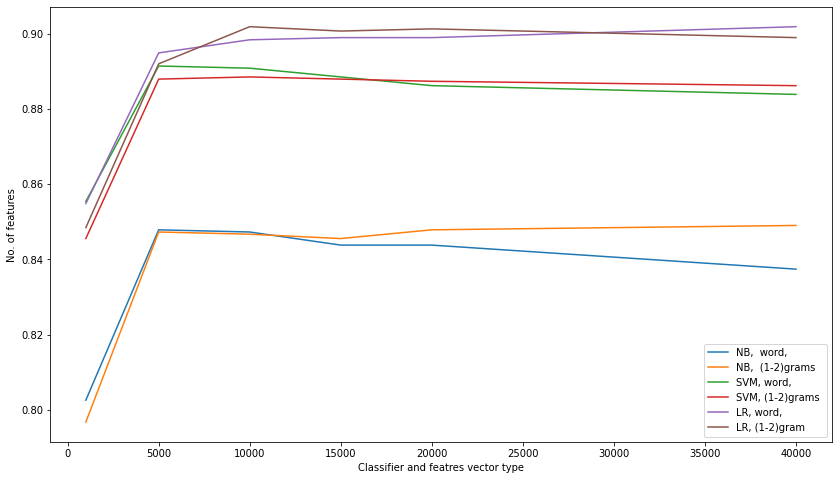

In [52]:
fig =  df.plot.line(figsize=(14,8), xlabel='Classifier and featres vector type', ylabel='No. of features').get_figure()

In [53]:
fig.savefig(fig_path + 'wiki_tfidf_classfiers_features_number_accuracy_chart_lemmas.svg')

In [54]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(14,8))

# sns.heatmap(df, annot=True, cmap="Blues")
# plt.savefig(save_heat_map_path)
# plt.xlabel('Classifier and featres vector type')
# plt.ylabel('No. of features')